In [1]:
import time

import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as SKDecisionTreeClassifier, DecisionTreeRegressor as SKDecisionTreeRegressor

from decision_tree_classification import DecisionTreeClassifier
from decision_tree_regression import DecisionTreeRegression

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
def prepare_dataset(target: str) -> tuple:
	X, y = df.drop(columns=[target]), df[target]
	categorical_features = X.columns[(X.dtypes == object)]
	for c in X.columns:
		X[c] = X[c].sample(frac=0.8)
	
	for c in categorical_features:
		X[c] = LabelEncoder().fit_transform(X[c])
	
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
	return X_train, X_test, y_train, y_test

In [4]:
clf_X_train, clf_X_test, clf_y_train, clf_y_test = prepare_dataset('loan_status')
reg_X_train, reg_X_test, reg_y_train, reg_y_test = prepare_dataset('credit_score')

In [5]:
def test_classifier(instance):
	instance.fit(clf_X_train, clf_y_train)
	y_pred = instance.predict(clf_X_test)
	print('Classification Report')
	print(classification_report(clf_y_test, y_pred))
	print('Feature Importances')
	print(instance.feature_importances_)

In [6]:
def mse(y_true, y_pred):
	return ((y_true - y_pred) ** 2).mean()


def plot_regression(y_pred, y_true, lim=100):
	x = list(range(len(y_pred)))[:lim]
	plt.plot(x, y_pred[:lim], label='prediction')
	plt.plot(x, y_true[:lim], label='true')
	plt.legend()
	plt.show()


def test_regressor(instance):
	instance.fit(reg_X_train, reg_y_train)
	y_pred = instance.predict(reg_X_test)
	print('Mean Squared Error')
	print(mse(reg_y_test, y_pred))
	plot_regression(y_pred, reg_y_test)
	print('Feature Importances')
	print(instance.feature_importances_)

In [7]:
inf = 999999999
max_depth = 10
max_leafs = 40

In [8]:
classifiers = (
	('My implementation, without reduction', DecisionTreeClassifier(max_depth=inf, max_leafs=inf)),
	('My implementation, with reduction', DecisionTreeClassifier(max_depth=max_depth, max_leafs=max_leafs)),
    ('SK implementation, without reduction', SKDecisionTreeClassifier()),
    ('SK implementation, with reduction', SKDecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leafs)),
)

for label, clf in classifiers:
	print(f'\t{label.upper()}')
	start = time.monotonic()
	test_classifier(clf)
	print('Time', time.monotonic() - start)

	MY IMPLEMENTATION, WITHOUT REDUCTION
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10448
           1       0.72      0.59      0.65      3052

    accuracy                           0.85     13500
   macro avg       0.80      0.76      0.78     13500
weighted avg       0.85      0.85      0.85     13500

Feature Importances
[0.01894143 0.00641642 0.00726881 0.03692803 0.00679546 0.02836621
 0.01252996 0.01266869 0.05910727 0.08037743 0.00432722 0.01775137
 0.04405689]
Time 53.039865291910246
	MY IMPLEMENTATION, WITH REDUCTION
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     10448
           1       0.61      0.64      0.63      3052

    accuracy                           0.83     13500
   macro avg       0.75      0.76      0.76     13500
weighted avg       0.83      0.83      0.83     13500

Feature Importances
[0.00113869 0.0006

	My implementation, without reduction
Mean Squared Error
4794.9077777777775


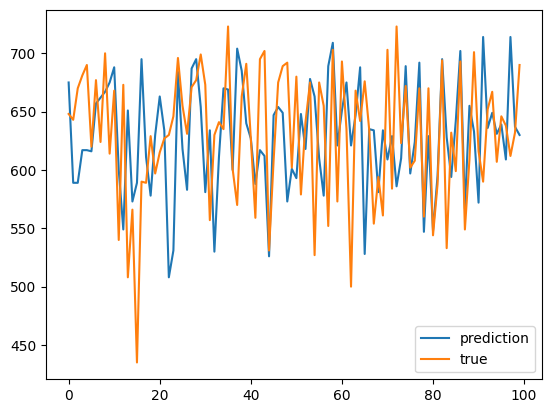

Feature Importances
[303.24963883 128.8113403  147.84211095 480.63050907 228.44587831
  74.5574076  238.71294605 155.59327102 383.50734552 210.07470226
 118.51128785  68.65731602  33.79554235]
Time 166.026264666114
	My implementation, with reduction
Mean Squared Error
2488.8095710998905


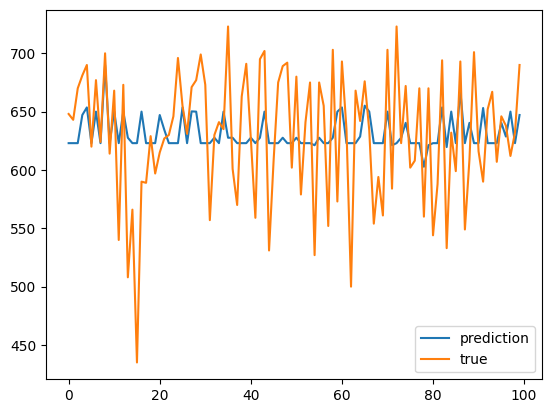

Feature Importances
[ 4.80978295  0.93298383 15.23786579  9.01882261 66.06634213  0.
  2.17571066  3.08642766  6.39203073  5.92304345  1.24275492 45.42956456
 30.91983572]
Time 16.374709374969825
	SK implementation, without reduction
Mean Squared Error
4948.688814814815


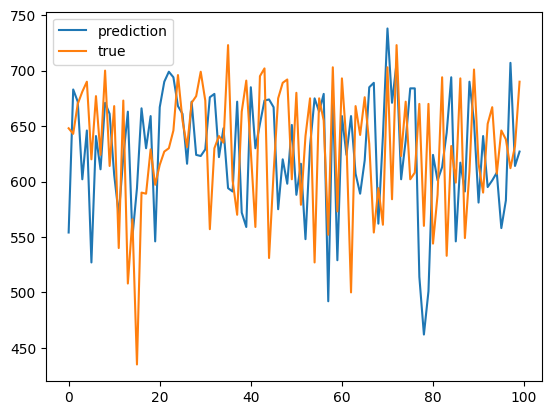

Feature Importances
[0.08914195 0.02920371 0.03880291 0.16219871 0.08842208 0.03352661
 0.12497163 0.06085236 0.15062129 0.10674515 0.0722683  0.02855956
 0.01468573]
Time 0.2801134579349309
	SK implementation, with reduction
Mean Squared Error
2361.1150864395418


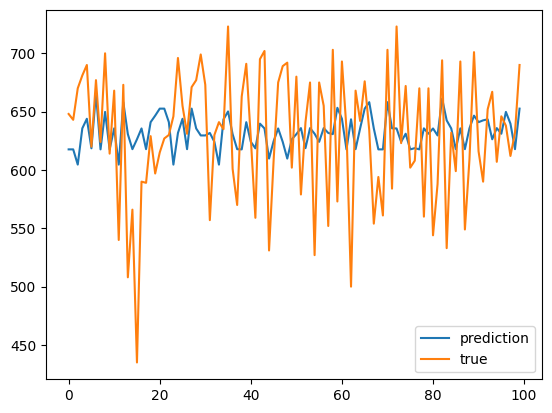

Feature Importances
[0.01880021 0.         0.27054895 0.         0.30043056 0.
 0.         0.         0.01497246 0.         0.01897619 0.28261367
 0.09365796]
Time 0.11996187479235232


In [9]:
regressors = (
	('My implementation, without reduction', DecisionTreeRegression(max_depth=inf, max_leafs=inf)),
	('My implementation, with reduction', DecisionTreeRegression(max_depth=max_depth, max_leafs=max_leafs)),
    ('SK implementation, without reduction', SKDecisionTreeRegressor()),
    ('SK implementation, with reduction', SKDecisionTreeRegressor(max_depth=max_depth, max_leaf_nodes=max_leafs)),
)

for label, reg in regressors:
	print(f'\t{label}')
	start = time.monotonic()
	test_regressor(reg)
	print('Time', time.monotonic() - start)